# BV analysis by Melissa Caza

## March 2022

In [1]:
import pandas as pd
from vega_datasets import data
import altair as alt

In [2]:
alt.renderers.enable ('mimetype')

RendererRegistry.enable('mimetype')

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
dis_df= pd.read_excel('Full_dataset_stripped_normalized.xlsx', sheet_name='dis2')
dis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sample                     1484 non-null   int64  
 1   BV_reviewed_score_sg       1484 non-null   object 
 2   CT                         926 non-null    float64
 3   Gene                       1484 non-null   object 
 4   Seegene_BV_Interpretation  1484 non-null   object 
 5   BV_consensus               1484 non-null   object 
 6   Hologic_BV                 1484 non-null   object 
 7   Agreement2                 1484 non-null   object 
 8   Agreement                  1484 non-null   object 
 9   Category                   1484 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 116.1+ KB


In [5]:
dis = dis_df[(dis_df['Seegene_BV_Interpretation'] == 'Bacterial Vaginosis') & (dis_df['BV_reviewed_score_sg'] == 'Negative (0-3)')]
dis.count()

Sample                       84
BV_reviewed_score_sg         84
CT                           58
Gene                         84
Seegene_BV_Interpretation    84
BV_consensus                 84
Hologic_BV                   84
Agreement2                   84
Agreement                    84
Category                     84
dtype: int64

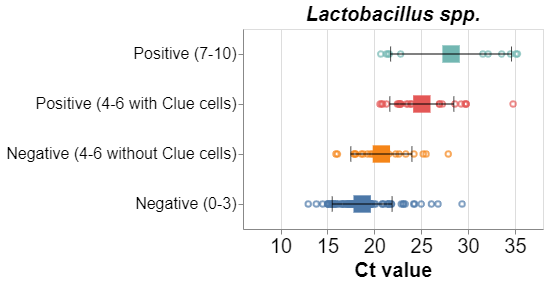

In [6]:
lacto = dis_df[(dis_df['Gene'] == 'Lactobacillus spp.') & (dis_df['Agreement2'] == 'Concordant')]
order=['Positive (7-10)','Positive (4-6 with Clue cells)','Negative (4-6 without Clue cells)','Negative (0-3)']

title=alt.TitleParams('Lactobacillus spp.', fontSize=20, fontStyle='Italic')
                                                
lacto_point_bv= alt.Chart(lacto, title=title).mark_point().encode(alt.X('CT:Q', title='Ct value', scale=alt.Scale(domain=[6,38]),axis=alt.Axis(labelAngle=0, labelFontSize=20, titleFontSize=20, grid=True,)),
                                                      alt.Y('BV_reviewed_score_sg:N' ,sort=order, axis=alt.Axis(labels=True,labelFontSize=16, titleFontSize=20, grid=False , labelLimit=900)), 
                                                    alt.Color('BV_reviewed_score_sg:N', legend=None))                                                 


lacto_mean_bv = alt.Chart(lacto).mark_square(size=300).encode(alt.X('mean(CT):Q', title='Ct value',  scale=alt.Scale(domain=[6,38]),axis=alt.Axis(labelAngle=45, labelFontSize=20, titleFontSize=20, grid=True,)),
                                                         alt.Y('BV_reviewed_score_sg:N' ,sort=order, axis=alt.Axis(labels=False,labelFontSize=16, titleFontSize=20, grid=False )),
                                                             alt.Color('BV_reviewed_score_sg:N', legend=None))

error_bars = alt.Chart(lacto).mark_errorbar(extent='stdev',ticks=True, color='black').encode(alt.X('CT:Q', title='Ct value',scale=alt.Scale(domain=[6,38]), axis=alt.Axis(labelAngle=45, labelFontSize=20, titleFontSize=20, grid=True,)),
                                                      alt.Y('BV_reviewed_score_sg:N', sort=order, title= None, axis=alt.Axis(labels=False,labelFontSize=16, titleFontSize=20, grid=False)))

lacto_chart =(lacto_point_bv+ lacto_mean_bv+error_bars ).properties(width=300, height=200).configure_axisY(titleX=-250)
lacto_chart

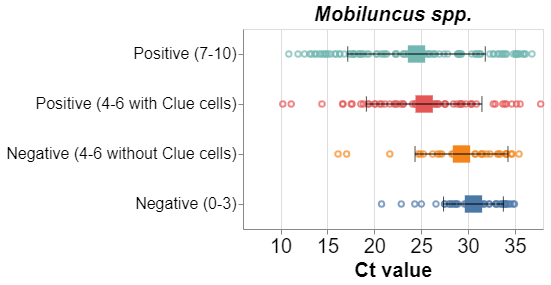

In [7]:
lacto = dis_df[(dis_df['Gene'] == 'Mobiluncus spp.') & (dis_df['Agreement2'] == 'Concordant')]
order=['Positive (7-10)','Positive (4-6 with Clue cells)','Negative (4-6 without Clue cells)','Negative (0-3)']

title=alt.TitleParams('Mobiluncus spp.', fontSize=20, fontStyle='Italic')
                                                
lacto_point_bv= alt.Chart(lacto, title=title).mark_point().encode(alt.X('CT:Q', title='Ct value', scale=alt.Scale(domain=[6,38]),axis=alt.Axis(labelAngle=0, labelFontSize=20, titleFontSize=20, grid=True,)),
                                                      alt.Y('BV_reviewed_score_sg:N' ,sort=order, axis=alt.Axis(labels=True,labelFontSize=16, titleFontSize=20, grid=False , labelLimit=900)), 
                                                    alt.Color('BV_reviewed_score_sg:N', legend=None))                                                 


lacto_mean_bv = alt.Chart(lacto).mark_square(size=300).encode(alt.X('mean(CT):Q', title='Ct value',  scale=alt.Scale(domain=[6,38]),axis=alt.Axis(labelAngle=45, labelFontSize=20, titleFontSize=20, grid=True,)),
                                                         alt.Y('BV_reviewed_score_sg:N' ,sort=order, axis=alt.Axis(labels=False,labelFontSize=16, titleFontSize=20, grid=False )),
                                                             alt.Color('BV_reviewed_score_sg:N', legend=None))

error_bars = alt.Chart(lacto).mark_errorbar(extent='stdev',ticks=True, color='black').encode(alt.X('CT:Q', title='Ct value',scale=alt.Scale(domain=[6,38]), axis=alt.Axis(labelAngle=45, labelFontSize=20, titleFontSize=20, grid=True,)),
                                                      alt.Y('BV_reviewed_score_sg:N', sort=order, title= None, axis=alt.Axis(labels=False,labelFontSize=16, titleFontSize=20, grid=False)))

lacto_chart =(lacto_point_bv+ lacto_mean_bv+error_bars ).properties(width=300, height=200).configure_axisY(titleX=-250)
lacto_chart

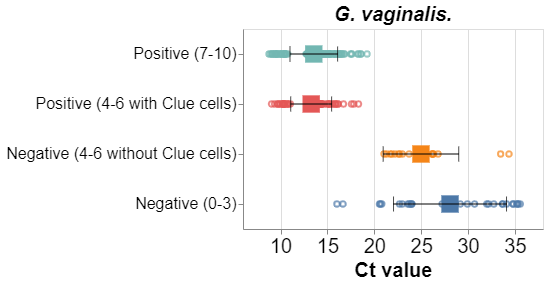

In [8]:
lacto = dis_df[(dis_df['Gene'] == 'G. vaginalis') & (dis_df['Agreement2'] == 'Concordant')]
order=['Positive (7-10)','Positive (4-6 with Clue cells)','Negative (4-6 without Clue cells)','Negative (0-3)']

title=alt.TitleParams('G. vaginalis.', fontSize=20, fontStyle='Italic')
                                                
lacto_point_bv= alt.Chart(lacto, title=title).mark_point().encode(alt.X('CT:Q', title='Ct value', scale=alt.Scale(domain=[6,38]),axis=alt.Axis(labelAngle=0, labelFontSize=20, titleFontSize=20, grid=True,)),
                                                      alt.Y('BV_reviewed_score_sg:N' ,sort=order, axis=alt.Axis(labels=True,labelFontSize=16, titleFontSize=20, grid=False , labelLimit=900)), 
                                                    alt.Color('BV_reviewed_score_sg:N', legend=None))                                                 


lacto_mean_bv = alt.Chart(lacto).mark_square(size=300).encode(alt.X('mean(CT):Q', title='Ct value',  scale=alt.Scale(domain=[6,38]),axis=alt.Axis(labelAngle=45, labelFontSize=20, titleFontSize=20, grid=True,)),
                                                         alt.Y('BV_reviewed_score_sg:N' ,sort=order, axis=alt.Axis(labels=False,labelFontSize=16, titleFontSize=20, grid=False )),
                                                             alt.Color('BV_reviewed_score_sg:N', legend=None))

error_bars = alt.Chart(lacto).mark_errorbar(extent='stdev',ticks=True, color='black').encode(alt.X('CT:Q', title='Ct value',scale=alt.Scale(domain=[6,38]), axis=alt.Axis(labelAngle=45, labelFontSize=20, titleFontSize=20, grid=True,)),
                                                      alt.Y('BV_reviewed_score_sg:N', sort=order, title= None, axis=alt.Axis(labels=False,labelFontSize=16, titleFontSize=20, grid=False)))

lacto_chart =(lacto_point_bv+ lacto_mean_bv+error_bars ).properties(width=300, height=200).configure_axisY(titleX=-250)
lacto_chart

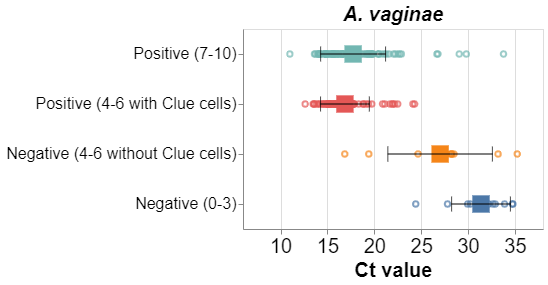

In [9]:
lacto = dis_df[(dis_df['Gene'] == 'A. vaginae') & (dis_df['Agreement2'] == 'Concordant')]
order=['Positive (7-10)','Positive (4-6 with Clue cells)','Negative (4-6 without Clue cells)','Negative (0-3)']

title=alt.TitleParams('A. vaginae', fontSize=20, fontStyle='Italic')
                                                
lacto_point_bv= alt.Chart(lacto, title=title).mark_point().encode(alt.X('CT:Q', title='Ct value', scale=alt.Scale(domain=[6,38]),axis=alt.Axis(labelAngle=0, labelFontSize=20, titleFontSize=20, grid=True,)),
                                                      alt.Y('BV_reviewed_score_sg:N' ,sort=order, axis=alt.Axis(labelFontSize=16, titleFontSize=20, grid=False , labelLimit=900)), 
                                                    alt.Color('BV_reviewed_score_sg:N', legend=None))                                                 


lacto_mean_bv = alt.Chart(lacto).mark_square(size=300).encode(alt.X('mean(CT):Q', title='Ct value',  scale=alt.Scale(domain=[6,38]),axis=alt.Axis(labelAngle=45, labelFontSize=20, titleFontSize=20, grid=True,)),
                                                         alt.Y('BV_reviewed_score_sg:N' ,sort=order, axis=alt.Axis(labelFontSize=16, titleFontSize=20, grid=False )),
                                                             alt.Color('BV_reviewed_score_sg:N', legend=None))

error_bars = alt.Chart(lacto).mark_errorbar(extent='stdev',ticks=True, color='black').encode(alt.X('CT:Q', title='Ct value',scale=alt.Scale(domain=[6,38]), axis=alt.Axis(labelAngle=45, labelFontSize=20, titleFontSize=20, grid=True,)),
                                                      alt.Y('BV_reviewed_score_sg:N', sort=order, title= None, axis=alt.Axis(labelFontSize=16, titleFontSize=20, grid=False)))

lacto_chart =(lacto_point_bv+ lacto_mean_bv+error_bars ).properties(width=300, height=200).configure_axisY(titleX=-250)
lacto_chart